# Creating a CNN model for Human Detection System

# 1. Import Libraries

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 2. Define Paths

In [9]:
pos_path = "../data/pos_person"
neg_path = "../data/neg_person"

# 3. Prepare Dataset

In [12]:
X = []
y = []

img_size = (64, 128)  # (width, height)

In [14]:
# Load positive (human) images
for file in os.listdir(pos_path):
    img = cv2.imread(os.path.join(pos_path, file), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    img = cv2.resize(img, img_size)
    X.append(img.reshape(128, 64, 1))
    y.append(1)

In [16]:
# Load negative (non-human) images
for file in os.listdir(neg_path):
    img = cv2.imread(os.path.join(neg_path, file), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    img = cv2.resize(img, img_size)
    X.append(img.reshape(128, 64, 1))
    y.append(0)

# 4. Convert & Normalize Data

In [19]:
X = np.array(X)
y = np.array(y)

# Normalize pixel values to [0, 1]
X = X / 255.0

print("X shape:", X.shape)

X shape: (6562, 128, 64, 1)


# 5. Train and Test Split Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 5249
Testing samples: 1313


# 6. Build CNN Model

In [25]:
# create CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 64, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 62, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 6, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,376,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,469,185 (5.60 MB)

 Trainable params: 1,469,185 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Compile Model

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 8. Train the Model

In [33]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.7550 - loss: 0.4829 - val_accuracy: 0.8987 - val_loss: 0.2181
Epoch 2/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9359 - loss: 0.1705 - val_accuracy: 0.9375 - val_loss: 0.1490
Epoch 3/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 28s 171ms/step - accuracy: 0.9416 - loss: 0.1390 - val_accuracy: 0.9543 - val_loss: 0.1199
Epoch 4/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.9588 - loss: 0.1132 - val_accuracy: 0.9619 - val_loss: 0.1021
Epoch 5/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 30s 180ms/step - accuracy: 0.9644 - loss: 0.0870 - val_accuracy: 0.9680 - val_loss: 0.0899
Epoch 6/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9736 - loss: 0.0682 - val_accuracy: 0.9688 - val_loss: 0.0821
Epoch 7/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.9766 - loss: 0.0636 - val_accuracy: 0.9642 - val_loss: 0.0964
Epoch 8/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.9658 - loss: 0

# 10. Evaluate Model

In [40]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
Confusion Matrix:
[[825   5]
 [ 98 385]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       830
           1       0.99      0.80      0.88       483

    accuracy                           0.92      1313
   macro avg       0.94      0.90      0.91      1313
weighted avg       0.93      0.92      0.92      1313



# 11. Save the Model

In [43]:
model.save("../model/human_detector_cnn.h5")
print("Model saved to ../model/human_detector_cnn.h5")

Model saved to ../model/human_detector_cnn.h5


# 12. Test Prediction on a new test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


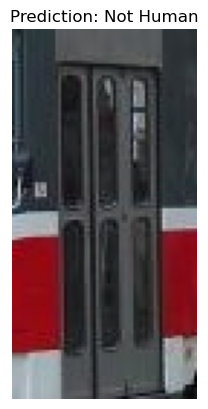

In [46]:
# Load model
model = tf.keras.models.load_model("../model/human_detector_cnn.h5")

# Load test image
test_img_path = "../data/predictTestImages/4_1.jpg"
img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, img_size)
img = img / 255.0
img_input = img.reshape(1, 128, 64, 1)

# Predict
prediction = model.predict(img_input)
label = "Human" if prediction[0][0] > 0.5 else "Not Human"

# Show image
img_rgb = cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Prediction: {label}")
plt.axis("off")
plt.show()

# 13. Predict on Multiple new test images

Processing: 4_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Prediction: Not Human


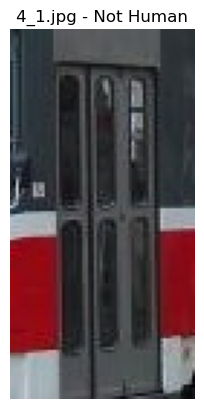

Processing: 6_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Prediction: Not Human


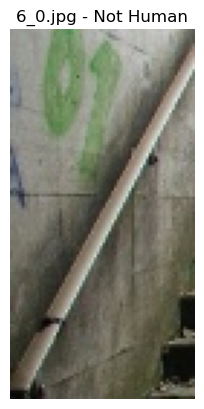

Processing: 6_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction: Not Human


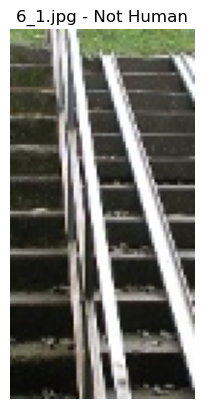

Processing: 6_13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction: Not Human


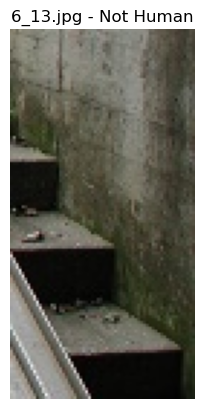

Processing: 6_14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction: Not Human


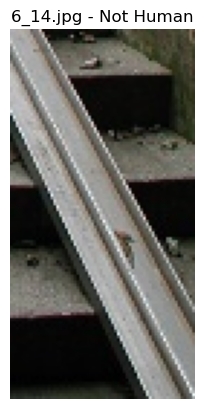

Processing: 7_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction: Not Human


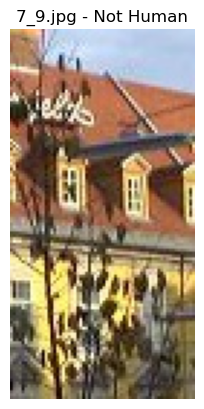

Processing: 9_6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Prediction: Not Human


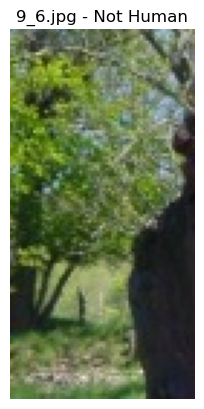

Processing: 00000006a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediction: Not Human


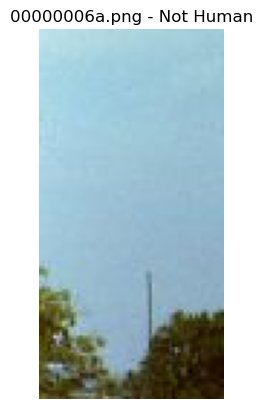

Processing: crop001037b.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Prediction: Not Human


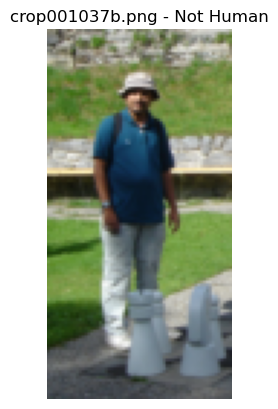

Processing: crop001047a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Human


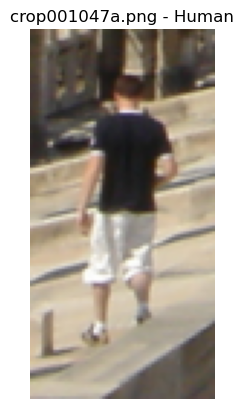

Processing: crop001047b.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Human


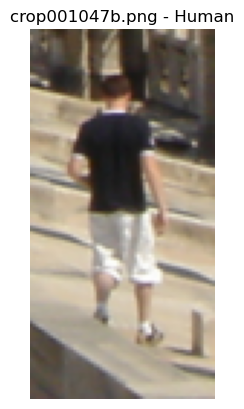

Processing: crop001048a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediction: Not Human


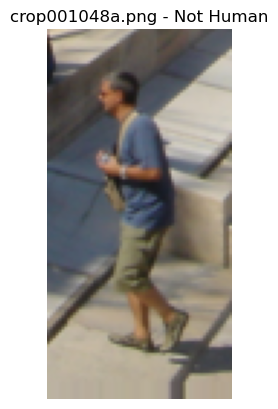

Processing: crop001051a.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: Human


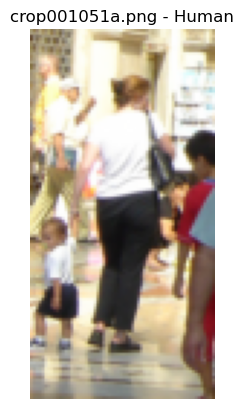

Processing: crop001055b.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediction: Human


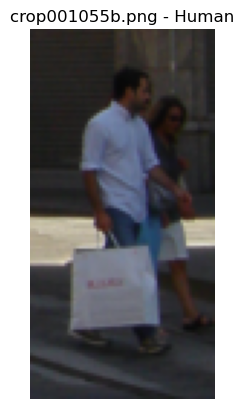

In [49]:
import glob

# Load trained CNN model
cnn_model = tf.keras.models.load_model("../model/human_detector_cnn.h5")

# Image input size and channels for CNN
img_size = (64, 128)  # width x height

# Collect all test image paths
test_image_files = glob.glob("../data/predictTestImages/*.jpg") + \
                   glob.glob("../data/predictTestImages/*.jpeg") + \
                   glob.glob("../data/predictTestImages/*.png")

# Loop through each test image
for image_path in test_image_files:
    print(f"Processing: {os.path.basename(image_path)}")
    
    # Load grayscale image
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print("Failed to load image.")
        continue

    # Resize, normalize, reshape for CNN input
    img_resized = cv2.resize(img_gray, img_size)
    img_normalized = img_resized / 255.0
    img_input = img_normalized.reshape(1, 128, 64, 1)  # batch, height, width, channels
    
    # Predict using CNN
    prediction = cnn_model.predict(img_input)
    label = "Human" if prediction[0][0] > 0.5 else "Not Human"
    print(f"Prediction: {label}")
    
    # Show original image in color with result
    img_color = cv2.imread(image_path)
    if img_color is not None:
        img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f"{os.path.basename(image_path)} - {label}")
        plt.axis("off")
        plt.show()